In [32]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd

In [33]:
def scrape_rockfm_page(base_url='https://onlineradiobox.com/es/rockfm/playlist/'):
    # Set headers to mimic a real browser
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

    songs = []
    today = datetime.today().date()
    
    for page_idx in range(1, 8):
        
        idx = '' if page_idx == 0 else str(page_idx)
        
        date = today - timedelta(days=page_idx)
        date = date.strftime("%Y-%m-%d")
     
        page_url = base_url + idx + '?cs=es.rockfm'
    
        # Fetch the content of the webpage
        response = requests.get(page_url, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Find the table
            table = soup.find("table", class_="tablelist-schedule")

            # Extract rows from the table
            rows = table.find_all("tr")
 
            for row in rows:
                # Extract time
                time_cell = row.find("td", class_="tablelist-schedule__time")
                time_text = time_cell.find("span", class_="time--schedule").text.strip() if time_cell else "N/A"

                # Extract track info
                track_cell = row.find("td", class_="track_history_item")
                try:
                    track_text = track_cell.find("a").text.strip() if track_cell else ''
                except:
                    track_text = track_cell.text.strip() if track_cell else ''
                    
                artist = track_text.split(' - ')[0]
                song = track_text.split(' - ')[1]
                
                # List with one song's data
                song = [date, time_text, artist, song]
                songs.append(song)
                songs = songs[::-1]
        
        # Dataframe with all songs data
        songs_df = pd.DataFrame(songs, columns=["Date", "Time", "Artist", "Song"])
                      
    return songs_df


# URL to scrape
base_url = 'https://onlineradiobox.com/es/rockfm/playlist/'

# Scrape the songs data
songs = scrape_rockfm_page(base_url)
songs



,Date,Time,Artist,Song
0,2024-12-17,00:04,BLONDIE,CALL ME
1,2024-12-17,00:12,DAVID BOWIE,HEROES
2,2024-12-17,00:22,ALICE COOPER,SCHOOL'S OUT
3,2024-12-17,00:30,ZZ TOP,LA GRANGE
4,2024-12-17,00:36,HÉROES DEL SILENCIO,LA CHISPA ADECUADA
...,...,...,...,...
2060,2024-12-17,00:41,THE STROKES,LAST NITE
2061,2024-12-17,00:33,INXS,NEED YOU TONIGHT
2062,2024-12-17,00:25,GARY MOORE,OUT IN THE FIELDS
2063,2024-12-17,00:18,THE DARKNESS,I BELIEVE IN A THING CALLED LOVE


In [34]:
# Get the number of unique artists
unique_artists_count = songs["Artist"].nunique()
unique_artists_count

270

In [35]:
# Get unique combinations of Artist and Song
unique_songs = songs[["Artist", "Song"]].nunique()
unique_songs

Artist    270
Song      627
dtype: int64

In [36]:
# Group by Artist and Song, then count the occurrences of each combination
combination_counts = (songs.groupby(["Artist", "Song"])
                           .size()
                           .reset_index(name="Count")
                           .sort_values(by="Count", ascending=False))

# Display the result
combination_counts

,Artist,Song,Count
404,PRESIDENTS OF THE U.S.A.,LUMP,10
629,ZZ TOP,LA GRANGE,9
501,T REX,GET IT ON,9
581,THE WHO,WHO ARE YOU,8
276,JANIS JOPLIN,CRY BABY,8
...,...,...,...
13,AC/DC,WHOLE LOTTA ROSIE,1
12,AC/DC,WHO MADE WHO,1
6,AC/DC,MISTRESS FOR CHRISTMAS,1
5,AC/DC,LET'S GET IT UP,1


In [37]:
def song_data(df, artist, song):
    song_df = df[(df['Artist'] == artist) & (df['Song'] == song)]
    song_df_sorted = song_df.sort_values(by=["Date", "Time"], ascending=[True, True])
    return song_df_sorted

In [39]:
song_la_grange = song_data(songs, 'ZZ TOP', 'LA GRANGE')
song_la_grange

,Date,Time,Artist,Song
3,2024-12-17,00:30,ZZ TOP,LA GRANGE
1929,2024-12-17,22:34,ZZ TOP,LA GRANGE
241,2024-12-18,16:03,ZZ TOP,LA GRANGE
1659,2024-12-19,20:04,ZZ TOP,LA GRANGE
1610,2024-12-20,05:21,ZZ TOP,LA GRANGE
635,2024-12-21,11:21,ZZ TOP,LA GRANGE
778,2024-12-22,07:45,ZZ TOP,LA GRANGE
843,2024-12-22,17:20,ZZ TOP,LA GRANGE
1004,2024-12-23,19:41,ZZ TOP,LA GRANGE


In [36]:
def artist_data(df, artist):
    artist_df = df[df['Artist'] == artist]
    artist_df_sorted = artist_df.sort_values(by=["Date", "Time"], ascending=[True, True])
    return artist_df_sorted

In [40]:
artist_foreigner = artist_data(songs, 'FOREIGNER')
artist_foreigner

,Date,Time,Artist,Song
2017,2024-12-17,07:20,FOREIGNER,COLD AS ICE
2003,2024-12-17,10:39,FOREIGNER,I WANT TO KNOW WHAT LOVE IS
1908,2024-12-18,01:40,FOREIGNER,I WANT TO KNOW WHAT LOVE IS
170,2024-12-18,03:32,FOREIGNER,URGENT
275,2024-12-18,21:18,FOREIGNER,COLD AS ICE
1727,2024-12-19,09:59,FOREIGNER,COLD AS ICE
511,2024-12-20,15:59,FOREIGNER,COLD AS ICE
577,2024-12-21,02:00,FOREIGNER,URGENT
1376,2024-12-21,19:02,FOREIGNER,COLD AS ICE
773,2024-12-22,07:03,FOREIGNER,I WANT TO KNOW WHAT LOVE IS


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

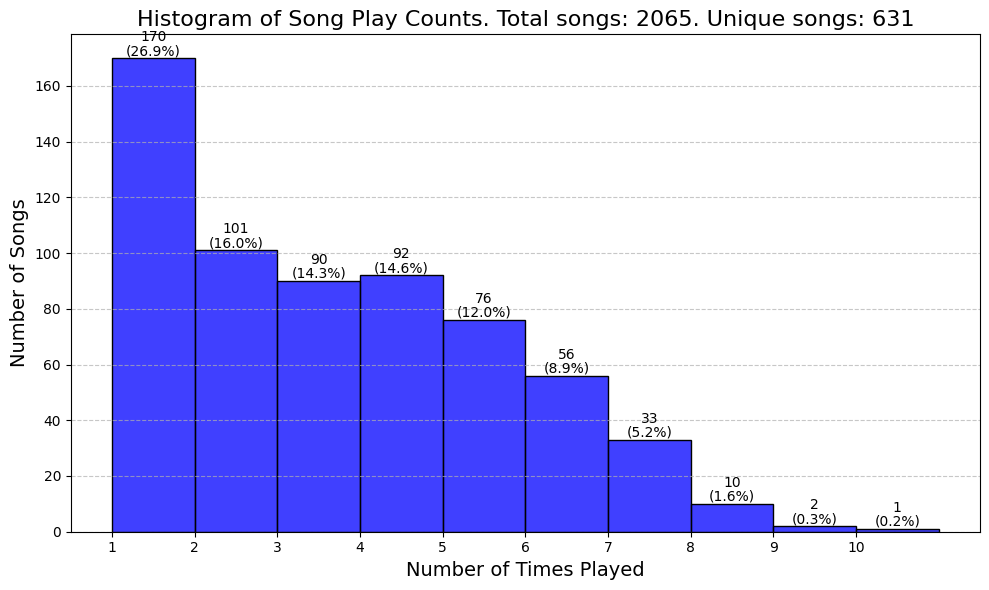

In [47]:
# Visualize the histogram
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(play_counts["PlayCount"], bins=range(1, play_counts["PlayCount"].max() + 2), kde=False, color='blue')

# Get the total and unique songs to calculate the percentage
total_songs = play_counts["PlayCount"].sum()
unique_songs = combination_counts.shape[0]

# Add value and percentage labels on top of each bar
for p in hist_plot.patches:
    height = p.get_height()  # Get the height (count) of each bar
    x = p.get_x() + p.get_width() / 2  # Get the x position for the label
    y = height  # Place the label at the height of the bar
    percentage = (height / unique_songs) * 100  # Calculate the percentage
    hist_plot.text(x, y + 5, f'{height}', ha='center', va='bottom', fontsize=10, color='black')  # Display count and percentage
    hist_plot.text(x, y, f'({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, color='black')  # Display count and percentage

# Plot
plt.title(f"Histogram of Song Play Counts. Total songs: {total_songs}. Unique songs: {unique_songs}", fontsize=16)
plt.xlabel("Number of Times Played", fontsize=14)
plt.ylabel("Number of Songs", fontsize=14)
plt.xticks(range(1, play_counts["PlayCount"].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()